In [15]:
import fxcmpy 
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

%matplotlib inline

from pyti.exponential_moving_average import exponential_moving_average as ema
token = 'cdb8fefb1b47ac6efc7974002398d6a3ea500731'

In [16]:
#con = fxcmpy.fxcmpy(config_file='fxcm.cfg')
con = fxcmpy.fxcmpy(access_token=token, log_level='error')
df = con.get_candles('GBP/JPY', period = 'D1', 

                     start = dt.datetime(2019, 1, 1), end = dt.datetime(2019, 11, 8))
df 

pip_cost = .0879
lot_size = 10
ema_fast = 12
ema_slow = 20

In [17]:
#Creating signals for dataframe
df['ema_fast'] = ema(df['askclose'], ema_fast)
df['ema_slow'] = ema(df['askclose'], ema_slow)
df['position'] = np.where(df['ema_fast'] > df['ema_slow'],1,0)
df['signal'] = df['position'].diff()
df['difference (pips)'] = (df['askclose'] - df['askopen']) * 100

returns = 0
CountPL=False

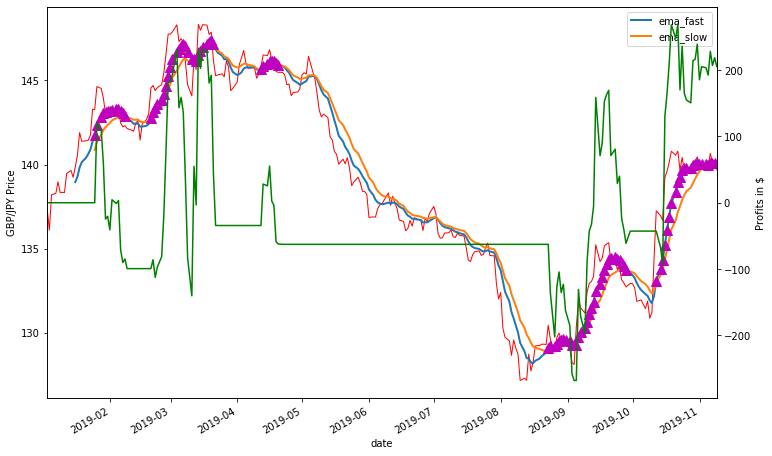

In [18]:
for i, row in df.iterrows():

    if CountPL==True:

        returns += (row['difference (pips)'] * pip_cost * lot_size)

        df.loc[i,'total'] = returns

    else:

        df.loc[i,'total'] = returns
    if row['position'] == 1:

        CountPL=True

    else:

        CountPL=False 

fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(111,  ylabel='GBP/JPY Price')

df['askclose'].plot(ax=ax1, color='r', lw=1)

df[['ema_fast', 'ema_slow']].plot(ax=ax1, lw=2)

ax1.plot(df.loc[df.position == 1.0].index, 

         df.ema_fast[df.position == 1.0],

         '^', markersize=10, color='m')

ax1.plot(df.loc[df.position == -1.0].index, 

         df.ema_slow[df.position == -1.0],

         'v', markersize=10, color='k')

ax2 = ax1.twinx()

ax2.set_ylabel('Profits in $')

ax2.plot(df['total'], color = 'green')